# Self-Organizing Maps (SOM)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
df = pd.read_csv('../../dataset/tanzil.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].fillna(df[numeric_cols].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sample_size = min(2000, len(X_scaled))
sample_idx = np.random.choice(len(X_scaled), sample_size, replace=False)
X_som = X_scaled[sample_idx]

print(f'SOM data shape: {X_som.shape}')

SOM data shape: (2000, 8)


In [6]:
som = MiniSom(x=10, y=10, input_len=X_som.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(X_som, num_iteration=1000, verbose=False)

winners = np.array([som.winner(x) for x in X_som])

quantization_error = np.mean([np.linalg.norm(X_som[i] - som.get_weights()[winners[i][0], winners[i][1]]) 
                              for i in range(len(X_som))])

print(f'Quantization Error: {quantization_error:.4f}')

Quantization Error: 1.6048


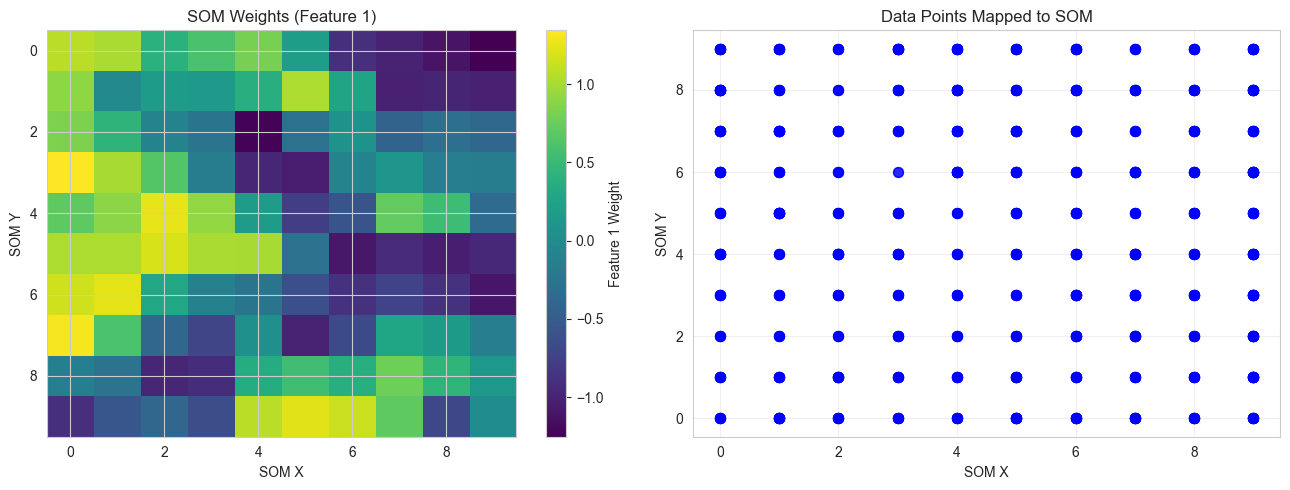

In [7]:
weights = som.get_weights()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

im = ax1.imshow(weights[:, :, 0], cmap='viridis', aspect='auto')
plt.colorbar(im, ax=ax1, label='Feature 1 Weight')
ax1.set_title('SOM Weights (Feature 1)')
ax1.set_xlabel('SOM X')
ax1.set_ylabel('SOM Y')

for i, (x, y) in enumerate(winners):
    ax2.scatter(x, y, c='blue', s=50, alpha=0.3)

ax2.set_title('Data Points Mapped to SOM')
ax2.set_xlabel('SOM X')
ax2.set_ylabel('SOM Y')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()